# Maharashtra Pollution Data 1987-2015

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
Base_Poll = pd.read_csv("D:\personal\MS\Base_poll_date.csv")

In [4]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, skipfooter=0, doublequote=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    Read CSV (comma-separated) file into DataFrame
    
    Also supports optionally itera

In [5]:
Base_Poll.head()

,Unnamed: 0,Sampling_Date,Sampling Date,State,City/Town/Village/Area,Type of Location,SO2,NO2,RSPM/PM10,SPM,Sampling_Date_processed,month_number,year_number
0,1,01-01-1988,01-01-1988,Maharashtra,Pune,"Residential, Rural and other Areas",1.8,28.9,NaN,271.0,1988-01-01,1,1988
1,2,01-01-2003,01-01-2003,Maharashtra,Nagpur,"Residential, Rural and other Areas",4.0,11.0,NaN,120.0,2003-01-01,1,2003
2,3,01-01-2003,01-01-2003,Maharashtra,Nagpur,"Residential, Rural and other Areas",6.0,9.0,NaN,69.0,2003-01-01,1,2003
3,4,01-01-2004,01-01-2004,Maharashtra,Nashik,"Residential, Rural and other Areas",31.0,26.0,38.0,86.0,2004-01-01,1,2004
4,5,01-01-2004,01-01-2004,Maharashtra,Pune,"Residential, Rural and other Areas",30.0,80.0,495.0,202.0,2004-01-01,1,2004


In [6]:
Base_Poll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60420 entries, 0 to 60419
Data columns (total 13 columns):
Unnamed: 0                 60420 non-null int64
Sampling_Date              60420 non-null object
Sampling Date              60420 non-null object
State                      60420 non-null object
City/Town/Village/Area     60420 non-null object
Type of Location           60121 non-null object
SO2                        58358 non-null float64
NO2                        59203 non-null float64
RSPM/PM10                  55439 non-null float64
SPM                        22377 non-null float64
Sampling_Date_processed    57825 non-null object
month_number               60420 non-null int64
year_number                60420 non-null int64
dtypes: float64(4), int64(3), object(6)
memory usage: 6.0+ MB


#### Let's Drop the unused columns first
#### Sampling_Date & Sampling Date are reductance as compared to Sampling_Date_processed

In [7]:
Base_Poll.drop(['Sampling_Date','Sampling Date'], axis=1,inplace=True)

#### Let's Look at the continuous variables

In [8]:
Base_Poll.describe()

,Unnamed: 0,SO2,NO2,RSPM/PM10,SPM,month_number,year_number
count,60420.000000,58358.000000,59203.000000,55439.000000,22377.000000,60420.000000,60420.000000
mean,30210.500000,17.367584,32.112512,101.479608,205.254385,6.569398,2010.109699
std,17441.895969,13.540093,19.062229,61.460782,129.990994,3.468318,4.248038
min,1.000000,0.000000,1.000000,1.000000,4.000000,1.000000,1987.000000
25%,15105.750000,9.000000,18.000000,59.000000,114.000000,4.000000,2008.000000
50%,30210.500000,14.000000,29.000000,90.000000,180.000000,7.000000,2011.000000
75%,45315.250000,22.000000,41.000000,128.000000,265.000000,10.000000,2013.000000
max,60420.000000,597.000000,640.000000,946.000000,1733.000000,13.000000,2015.000000


#### Their are outliner in SO2, NO2, RSPM/PM10 & SPM we will handle little later in the flow
#### Let's handle Null values first

In [9]:
Base_Poll.isnull().sum()
#For the continuous variables shown above we will replace the values with -1 for us to observe them during EDA
#The actual repalce via Mean, median WOE etc will be looked at a later stage

Unnamed: 0                     0
State                          0
City/Town/Village/Area         0
Type of Location             299
SO2                         2062
NO2                         1217
RSPM/PM10                   4981
SPM                        38043
Sampling_Date_processed     2595
month_number                   0
year_number                    0
dtype: int64

In [10]:
Base_Poll.columns

Index(['Unnamed: 0', 'State', 'City/Town/Village/Area', 'Type of Location',
       'SO2', 'NO2', 'RSPM/PM10', 'SPM', 'Sampling_Date_processed',
       'month_number', 'year_number'],
      dtype='object')

In [11]:
Base_Poll.columns=['ID', 'State','City_Town_Village_Area', 'Type_of_Location', 'SO2', 'NO2', 'RSPM_PM10','SPM', 'Sampling_Date_processed', 'month_number', 'year_number']

In [12]:
Base_Poll.loc[np.isnan(Base_Poll.SO2),['SO2']]=-1
Base_Poll.loc[np.isnan(Base_Poll.NO2),['NO2']]=-1
Base_Poll.loc[np.isnan(Base_Poll.RSPM_PM10),['RSPM_PM10']]=-1
Base_Poll.loc[np.isnan(Base_Poll.SPM),['SPM']]=-1
Base_Poll.loc[np.isnan(Base_Poll.month_number),['month_number']]=-1
Base_Poll.loc[np.isnan(Base_Poll.year_number),['year_number']]=-1

In [13]:
Base_Poll.isnull().sum()

ID                            0
State                         0
City_Town_Village_Area        0
Type_of_Location            299
SO2                           0
NO2                           0
RSPM_PM10                     0
SPM                           0
Sampling_Date_processed    2595
month_number                  0
year_number                   0
dtype: int64

#### Sampling_Date_processed  is adate colum lets put in 1-1-1970as default their for null during EDA

In [14]:
Base_Poll["Sampling_Date_processed"].fillna("1970-01-01", inplace = True) 

In [15]:
Base_Poll['Type_of_Location'].fillna("Unknown", inplace = True) 

In [16]:
#All null are take care of for now
Base_Poll.isnull().sum()

ID                         0
State                      0
City_Town_Village_Area     0
Type_of_Location           0
SO2                        0
NO2                        0
RSPM_PM10                  0
SPM                        0
Sampling_Date_processed    0
month_number               0
year_number                0
dtype: int64

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:

Base_Poll[['SO2','NO2','RSPM_PM10','SPM','month_number','year_number']].head(5)

,SO2,NO2,RSPM_PM10,SPM,month_number,year_number
0,1.8,28.9,-1.0,271.0,1,1988
1,4.0,11.0,-1.0,120.0,1,2003
2,6.0,9.0,-1.0,69.0,1,2003
3,31.0,26.0,38.0,86.0,1,2004
4,30.0,80.0,495.0,202.0,1,2004


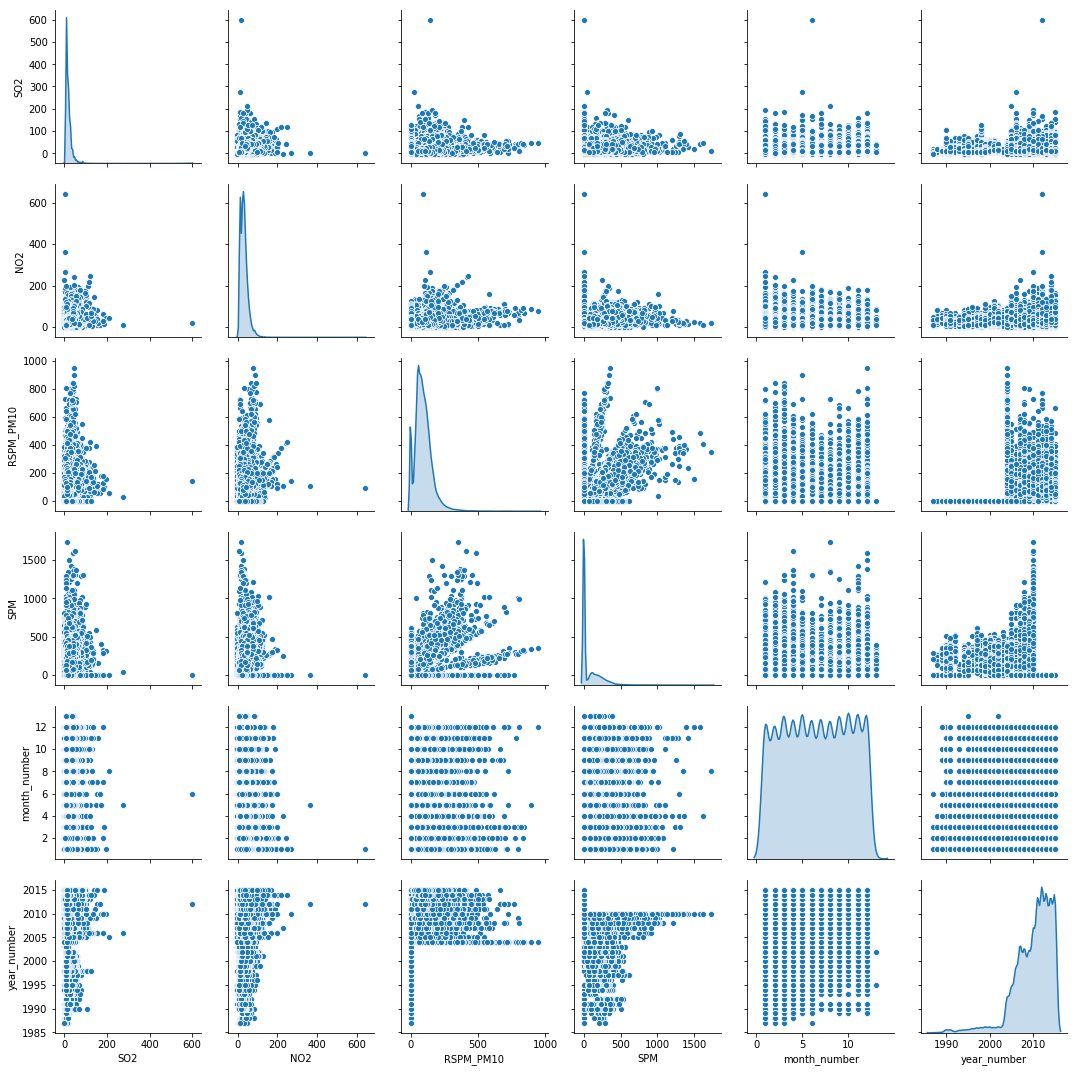

In [19]:
Base_Poll_Numeric=Base_Poll[['SO2','NO2','RSPM_PM10','SPM','month_number','year_number']]
sns.pairplot(Base_Poll_Numeric,  diag_kind='kde')
plt.show()

##### RSPM/PM10 jan, feb & march see high values
##### SO2 & NO2 seems to be high in Jan too
##### Q1. RSPM_PM10 seems to be availabe from 2004 onwards, we will validate this
#### The Outlier are being confimred in the a pairplots, and casuing our view to be sceked , let's fix that!


In [20]:
## Let;s address teh outliner issues now, since we saw tehm for the 2nd time
#SO2
Outlier_value=int(np.percentile(Base_Poll['SO2'].dropna().values,[99]))
Base_Poll.loc[Base_Poll.SO2>Outlier_value,['SO2']]=Outlier_value
#NO2
Outlier_value=int(np.percentile(Base_Poll['NO2'].dropna().values,[99]))
Base_Poll.loc[Base_Poll.NO2>Outlier_value,['NO2']]=Outlier_value
#RSPM_PM10
Outlier_value=int(np.percentile(Base_Poll['RSPM_PM10'].dropna().values,[99]))
Base_Poll.loc[Base_Poll.RSPM_PM10>Outlier_value,['RSPM_PM10']]=Outlier_value
#SPM
Outlier_value=int(np.percentile(Base_Poll['SPM'].dropna().values,[99]))
Base_Poll.loc[Base_Poll.SPM>Outlier_value,['SPM']]=Outlier_value
#month_number
Outlier_value=int(np.percentile(Base_Poll['month_number'].dropna().values,[99]))
Base_Poll.loc[Base_Poll.month_number>Outlier_value,['month_number']]=Outlier_value
#year_number
Outlier_value=int(np.percentile(Base_Poll['year_number'].dropna().values,[99]))

Base_Poll.loc[Base_Poll.year_number>Outlier_value,['year_number']]=Outlier_value
###if required tap the lower end be

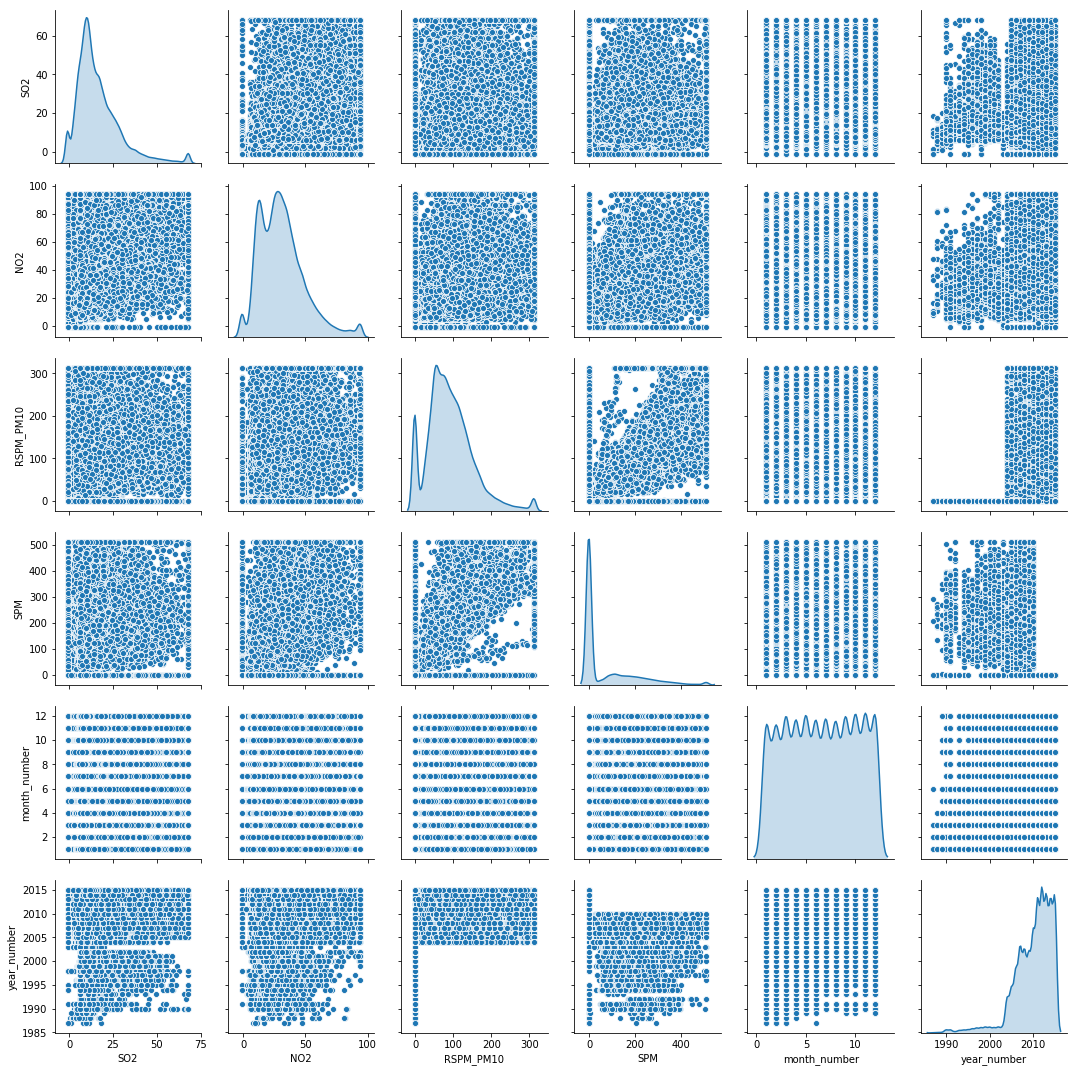

In [21]:
Base_Poll_Numeric=Base_Poll[['SO2','NO2','RSPM_PM10','SPM','month_number','year_number']]
sns.pairplot(Base_Poll_Numeric,  diag_kind='kde')
plt.show()
##plotas are more visually viable now

##### Previous observation seems invalid post handling the outliers
#### RSPM_PM10 & SPM are showing correlation which is expected
#### Year seems to have some co-relation with the pollutant which is again expected

In [22]:
Base_Poll.columns

Index(['ID', 'State', 'City_Town_Village_Area', 'Type_of_Location', 'SO2',
       'NO2', 'RSPM_PM10', 'SPM', 'Sampling_Date_processed', 'month_number',
       'year_number'],
      dtype='object')

#### Let's start with univariant analusing nwo taht we have temprorialy fixed null and out liers

### SO2

(0.0, 3070.0)

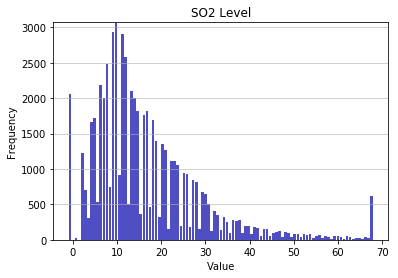

In [23]:
n, bins, patches = plt.hist(x=Base_Poll['SO2'].dropna().values, bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('SO2 Level')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

#### Right taile normally distributed

### NO2

(0.0, 2610.0)

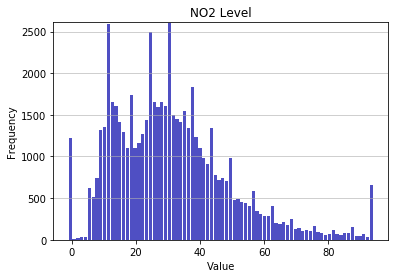

In [24]:
n, bins, patches = plt.hist(x=Base_Poll['NO2'].dropna().values, bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('NO2 Level')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

#### Again right tailed but has sikes in between not an ideal normal distibution
#### Might be more useful then the SO2 distribution

### RSPM_PM10

(0.0, 5000.0)

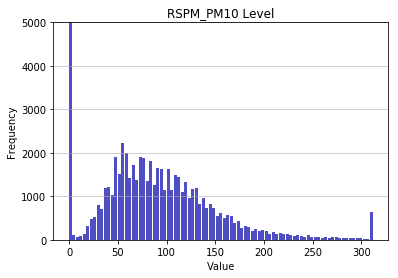

In [25]:
n, bins, patches = plt.hist(x=Base_Poll['RSPM_PM10'].dropna().values, bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('RSPM_PM10 Level')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

#### We can see the null filling with -1 has casue a spike and teh outlier tapping has caused a spike
#### Like other pollutant it has a long tale 
##### Q Task: Plot a box plot and validate the observation

### SPM

(0.0, 1070.0)

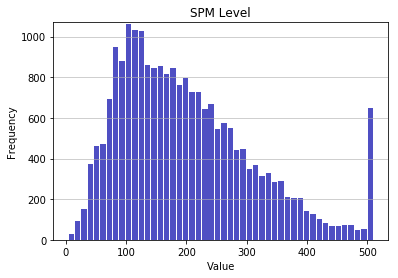

In [26]:
n, bins, patches = plt.hist(x=Base_Poll.loc[Base_Poll.SPM>=0,'SPM'].values, bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('SPM Level')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

#### we had to remove the null(-1) to see the plot preoperly, also the spike at caping
#### The distrubution has a thicker right tale

#### Month

(0.0, 5370.0)

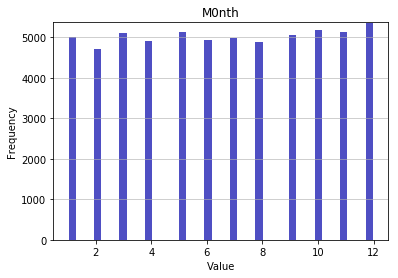

In [27]:
n, bins, patches = plt.hist(x=Base_Poll['month_number'].values, bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('M0nth')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
#print(np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

#### Month wise distribution is fine

### Year

(0.0, 7000.0)

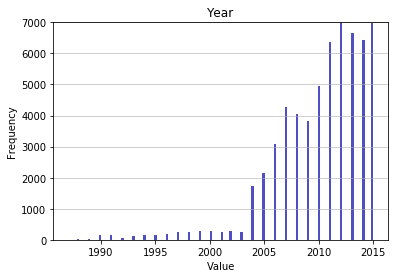

In [28]:
n, bins, patches = plt.hist(x=Base_Poll['year_number'].values, bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Year')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
#print(np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

#### We have higher frequecny from 2004 onwards an observation that we saw previously on the pair plots

## Let's Start with analysing catgorical variable

#### State

In [29]:
Base_Poll.State.unique()## we have data pertaing to one state only

array(['Maharashtra'], dtype=object)

In [30]:
Base_Poll.City_Town_Village_Area.unique()

array(['Pune', 'Nagpur', 'Nashik', 'Mumbai', 'Thane', 'Solapur',
       'Chandrapur', 'Aurangabad (MS)', 'Kolhapur', 'Tarapur', 'Amravati',
       'Lote', 'Navi Mumbai', 'Aurangabad', 'Latur', 'Jalgaon', 'Sangli',
       'Akola', 'Badlapur', 'Dombivli', 'Jalna', 'Nanded', 'Ulhasnagar',
       'Greater Mumbai', 'Mahad', 'Roha', 'Bombay', 'Chandarpur'],
      dtype=object)

#### Their is redundancy in our data
#### Aurangabad (MS)  & Aurangabad and Chandarpur & Chandrapur along with Mumbai & Bombay points to the same location
#### We will replace Them

In [31]:
Base_Poll.loc[Base_Poll.City_Town_Village_Area=='Bombay','City_Town_Village_Area']='Mumbai'
Base_Poll.loc[Base_Poll.City_Town_Village_Area=='Aurangabad (MS)','City_Town_Village_Area']='Aurangabad'
Base_Poll.loc[Base_Poll.City_Town_Village_Area=='Chandarpur','City_Town_Village_Area']='Chandrapur'
##use map to reolve this

In [32]:
Values=Base_Poll.City_Town_Village_Area.unique()
Values.sort()
print(Values)

['Akola' 'Amravati' 'Aurangabad' 'Badlapur' 'Chandrapur' 'Dombivli'
 'Greater Mumbai' 'Jalgaon' 'Jalna' 'Kolhapur' 'Latur' 'Lote' 'Mahad'
 'Mumbai' 'Nagpur' 'Nanded' 'Nashik' 'Navi Mumbai' 'Pune' 'Roha' 'Sangli'
 'Solapur' 'Tarapur' 'Thane' 'Ulhasnagar']


In [33]:
Base_Poll['City_Town_Village_Area'].value_counts()

Nagpur            7841
Navi Mumbai       5541
Pune              5184
Nashik            5148
Chandrapur        4862
Thane             3623
Kolhapur          3180
Aurangabad        3015
Mumbai            2890
Solapur           2630
Amravati          2456
Jalgaon           1853
Latur             1776
Sangli            1637
Nanded            1432
Akola             1048
Lote               957
Ulhasnagar         950
Jalna              905
Dombivli           829
Greater Mumbai     689
Tarapur            592
Badlapur           585
Mahad              543
Roha               254
Name: City_Town_Village_Area, dtype: int64

In [34]:
print([[i,i/2] for i in range(1,10)])

[[1, 0.5], [2, 1.0], [3, 1.5], [4, 2.0], [5, 2.5], [6, 3.0], [7, 3.5], [8, 4.0], [9, 4.5]]


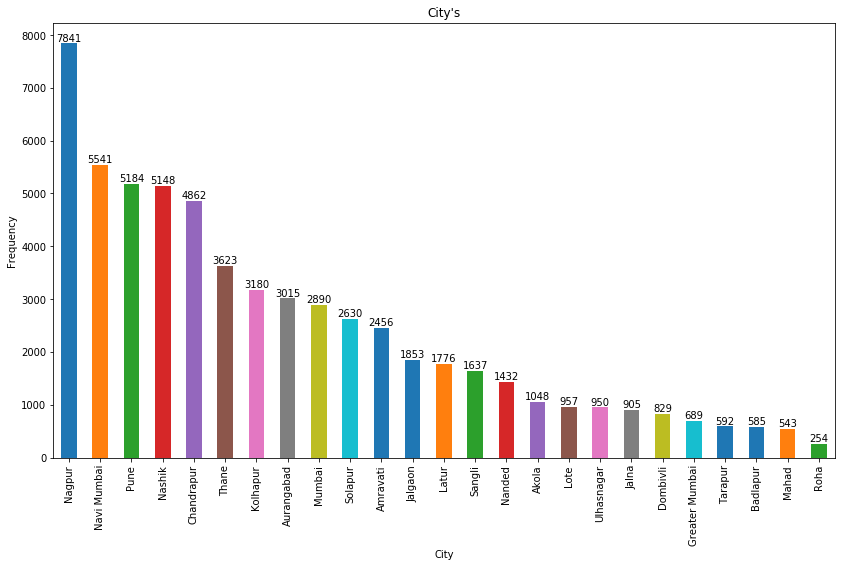

In [35]:
ax = Base_Poll['City_Town_Village_Area'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="City's")
ax.set_xlabel("City")
ax.set_ylabel("Frequency")

rects = ax.patches
label_array=pd.DataFrame()

labels = ["%d"% i for i in Base_Poll['City_Town_Village_Area'].value_counts()]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')
##add percentile to the map?

#### Nagpur, Navi Mumbai, Pune, Nashik, Chadrapur  till sangli seems to have higher value!

#### Type of Location

In [36]:
Base_Poll['Type_of_Location'].unique()

array(['Residential, Rural and other Areas', 'Industrial Area',
       'Residential and others', 'Industrial Areas', 'Sensitive Areas',
       'Sensitive Area', 'Unknown', 'Industrial', 'Residential'],
      dtype=object)

#### we will mearge all residential ,industrical and Sensitive together

In [37]:
Base_Poll

,ID,State,City_Town_Village_Area,Type_of_Location,SO2,NO2,RSPM_PM10,SPM,Sampling_Date_processed,month_number,year_number
0,1,Maharashtra,Pune,"Residential, Rural and other Areas",1.80,28.9,-1.00,271.00,1988-01-01,1,1988
1,2,Maharashtra,Nagpur,"Residential, Rural and other Areas",4.00,11.0,-1.00,120.00,2003-01-01,1,2003
2,3,Maharashtra,Nagpur,"Residential, Rural and other Areas",6.00,9.0,-1.00,69.00,2003-01-01,1,2003
3,4,Maharashtra,Nashik,"Residential, Rural and other Areas",31.00,26.0,38.00,86.00,2004-01-01,1,2004
4,5,Maharashtra,Pune,"Residential, Rural and other Areas",30.00,80.0,312.00,202.00,2004-01-01,1,2004
5,6,Maharashtra,Mumbai,"Residential, Rural and other Areas",-1.00,-1.0,-1.00,106.70,2004-01-01,1,2004
6,7,Maharashtra,Mumbai,"Residential, Rural and other Areas",-1.00,-1.0,-1.00,141.00,2004-01-01,1,2004
7,8,Maharashtra,Thane,"Residential, Rural and other Areas",13.70,17.5,-1.00,49.70,2004-01-01,1,2004
8,9,Maharashtra,Solapur,Industrial Area,19.33,44.5,146.67,392.67,2004-01-01,1,2004
9,10,Maharashtra,Nagpur,"Residential, Rural and other Areas",10.20,21.2,33.00,151.00,2004-01-01,1,2004


In [38]:
Base_Poll.loc[Base_Poll['Type_of_Location'].isin(['Residential, Rural and other Areas','Residential and others',]),'Type_of_Location']='Residential'
Base_Poll.loc[Base_Poll['Type_of_Location'].isin(['Industrial Area','Industrial Areas']),'Type_of_Location']='Industrial'
Base_Poll.loc[Base_Poll['Type_of_Location'].isin(['Sensitive Areas']),'Type_of_Location']='Sensitive Area'
#use map function to perform thsi action

In [39]:
Base_Poll['Type_of_Location'].unique()

array(['Residential', 'Industrial', 'Sensitive Area', 'Unknown'],
      dtype=object)

In [40]:
len(Base_Poll)
Base_Poll['Type_of_Location'].value_counts()

Residential       39490
Industrial        19637
Sensitive Area      994
Unknown             299
Name: Type_of_Location, dtype: int64

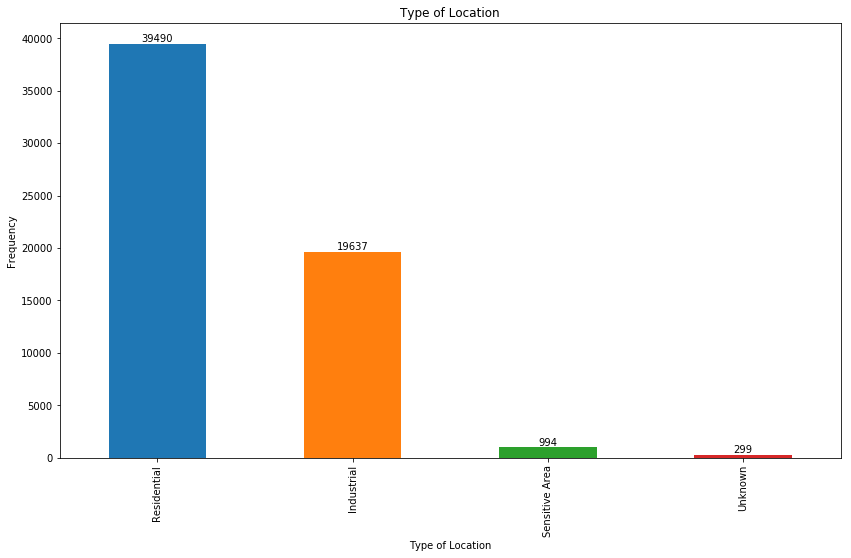

In [41]:
ax = Base_Poll['Type_of_Location'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Type of Location")
ax.set_xlabel("Type of Location")
ax.set_ylabel("Frequency")

rects = ax.patches
label_array=pd.DataFrame()

labels = ["%d"% i for i in Base_Poll['Type_of_Location'].value_counts()]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')

#### Residential data is dominating aong with industrial area
#### Put %ages along with count on the graph?

                                                   0
0  Rectangle(xy=(-0.25, 0), width=0.5, height=394...
1  Rectangle(xy=(0.75, 0), width=0.5, height=1963...
2  Rectangle(xy=(1.75, 0), width=0.5, height=994,...
3  Rectangle(xy=(2.75, 0), width=0.5, height=299,...


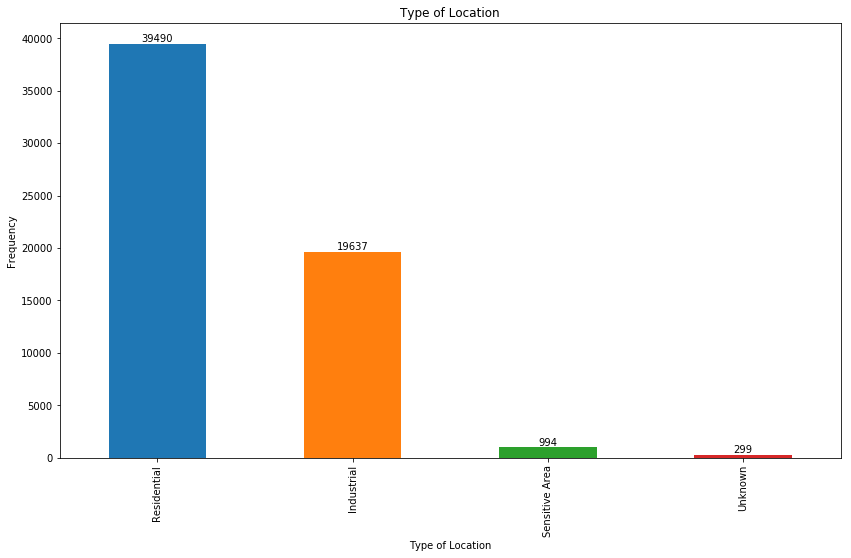

In [42]:
ax = Base_Poll['Type_of_Location'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Type of Location")
ax.set_xlabel("Type of Location")
ax.set_ylabel("Frequency")

rects = ax.patches
print(pd.DataFrame(rects))
label_array=pd.DataFrame()

labels = ["%d"% i for i in Base_Poll['Type_of_Location'].value_counts()]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')

### let's start with Bivariant analysis

#### Starting with NO2 vs SO2

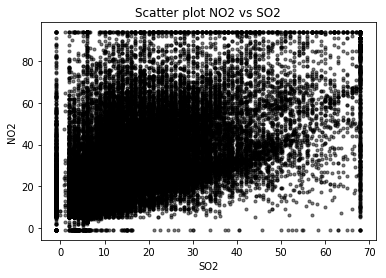

In [43]:
import matplotlib.pyplot as plt
x=Base_Poll['SO2']
y=Base_Poll['NO2']
colors = (0,0,0)
area = np.pi*3
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot NO2 vs SO2')
plt.xlabel('SO2')
plt.ylabel('NO2')
plt.show()

## not really clear from  the scatter plot
## relation ship is variaying from exponential to linear signalling that their are other factors at play here

#### Lets plot a density histogram to undestand teh relation ship a lil better

In [44]:
help(plt.hist2d)

Help on function hist2d in module matplotlib.pyplot:

hist2d(x, y, bins=10, range=None, normed=False, weights=None, cmin=None, cmax=None, hold=None, data=None, **kwargs)
    Make a 2D histogram plot.
    
    Parameters
    ----------
    x, y: array_like, shape (n, )
        Input values
    
    bins: [None | int | [int, int] | array_like | [array, array]]
    
        The bin specification:
    
            - If int, the number of bins for the two dimensions
              (nx=ny=bins).
    
            - If ``[int, int]``, the number of bins in each dimension
              (nx, ny = bins).
    
            - If array_like, the bin edges for the two dimensions
              (x_edges=y_edges=bins).
    
            - If ``[array, array]``, the bin edges in each dimension
              (x_edges, y_edges = bins).
    
        The default value is 10.
    
    range : array_like shape(2, 2), optional, default: None
         The leftmost and rightmost edges of the bins along each dimensio

#### Put a bar for color gradient of the bin?

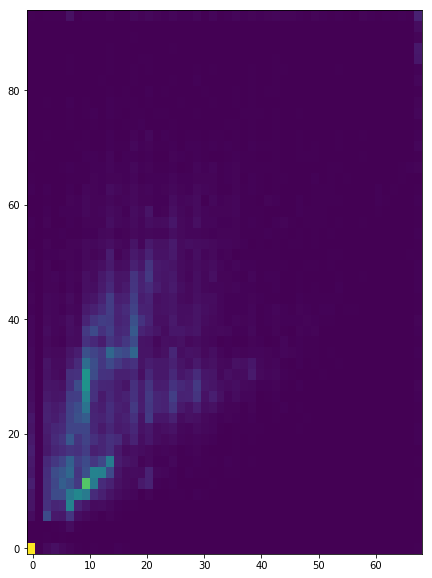

In [45]:
import matplotlib.pyplot as plt
x=Base_Poll['SO2']
y=Base_Poll['NO2']
fig = plt.figure(figsize=(10,10))
colors = (0,0,0)
area = np.pi*3
heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()

#### Except for few points in the diagonal and top part of diagonal the relationship is evenely spread across.
#### Relation ship is strong but most probably impacted by other contraints
#### Let's confirm thsi with Co-relation again

In [46]:
Base_Poll[['SO2','NO2']].corr() 
##0.525457 is high but the as we saw it's not as staringht forward

,SO2,NO2
SO2,1.000000,0.525457
NO2,0.525457,1.000000


In [47]:
Base_Poll.columns

Index(['ID', 'State', 'City_Town_Village_Area', 'Type_of_Location', 'SO2',
       'NO2', 'RSPM_PM10', 'SPM', 'Sampling_Date_processed', 'month_number',
       'year_number'],
      dtype='object')

#### We will use pair plot for remaing observationand study the important one sperately

C:\Users\hashmap\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


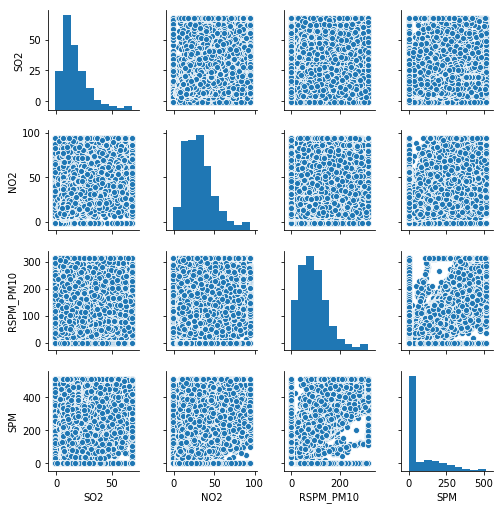

In [48]:

sns.pairplot(data=Base_Poll.loc[:,~Base_Poll.columns.isin(['ID','State','month_number','year_number'])], size=1.8)

##### RSPM_PM10 and SPM are the only two varaibles that seems to have a partial different pattern than other sets

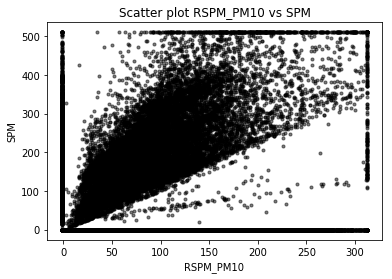

In [49]:
import matplotlib.pyplot as plt
x=Base_Poll['RSPM_PM10']
y=Base_Poll['SPM']
colors = (0,0,0)
area = np.pi*3
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot RSPM_PM10 vs SPM')
plt.xlabel('RSPM_PM10')
plt.ylabel('SPM')
plt.show()

## not really clear from  the scatter plot
## relation ship is variaying from exponential to linear signalling that their are other factors at play here

#### Seems like below the Diagonal their are only a few points lying comparitively

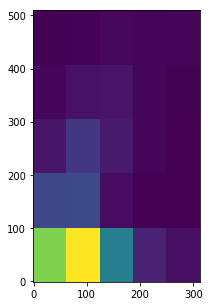

In [50]:
import matplotlib.pyplot as plt
x=Base_Poll['RSPM_PM10']
y=Base_Poll['SPM']
fig = plt.figure(figsize=(5,5))
colors = (0,0,0)
area = np.pi*3
heatmap, xedges, yedges = np.histogram2d(x, y, bins=5)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()

#### The behavious is confirmed

#### PCA with polynomial features is recomned for these variables

#### Lets put in year as color to see year wise gain

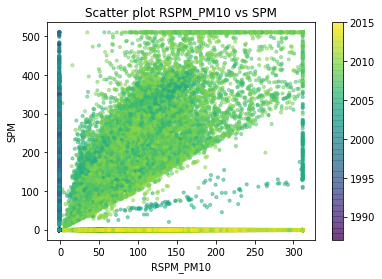

In [51]:
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
x=Base_Poll['RSPM_PM10']
y=Base_Poll['SPM']
col=Base_Poll['year_number']
area = np.pi*3
scatter=plt.scatter(x=x, y=y, s=area, c=col, alpha=0.5, cmap='viridis')
plt.title('Scatter plot RSPM_PM10 vs SPM')
plt.xlabel('RSPM_PM10')
plt.ylabel('SPM')

plt.colorbar()

plt.show()

#### Betn 2005-2010 their were prominant cases of spm increasing at a higher rate
#### Bevaious genrelised post 2005 



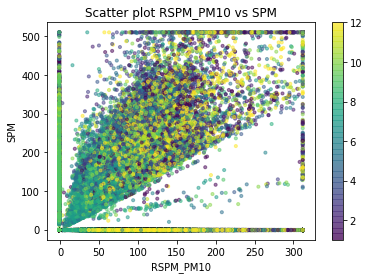

In [52]:
#month_number
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
x=Base_Poll['RSPM_PM10']
y=Base_Poll['SPM']
col=Base_Poll['month_number']
area = np.pi*3
scatter=plt.scatter(x=x, y=y, s=area, c=col, alpha=0.5, cmap='viridis')
plt.title('Scatter plot RSPM_PM10 vs SPM')
plt.xlabel('RSPM_PM10')
plt.ylabel('SPM')

plt.colorbar()

plt.show()

In [53]:
print(Base_Poll.month_number.unique())
print(sorted(Base_Poll.year_number.unique()))

[ 1  2  3  4  5  6  7  8  9 10 11 12]
[1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


In [54]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('SPM ~ month_number+year_number', data = Base_Poll[Base_Poll.SPM!=-1]).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                    sum_sq       df          F        PR(>F)
month_number  9.826448e+05      1.0  78.363273  9.196538e-19
year_number   6.822286e+05      1.0  54.405896  1.687506e-13
Residual      2.805612e+08  22374.0        NaN           NaN


#### Month as displayed has clear imapct on spm concentration, greater than year!

In [55]:
Base_Poll.RSPM_PM10.isnull().sum()
(Base_Poll.RSPM_PM10==-1).sum()

4981

In [56]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('RSPM_PM10 ~ month_number+year_number', data = Base_Poll.loc[Base_Poll.RSPM_PM10!=-1]).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                    sum_sq       df           F        PR(>F)
month_number  3.588350e+05      1.0  116.502621  3.925530e-27
year_number   5.050688e+05      1.0  163.980178  1.726999e-37
Residual      1.707462e+08  55436.0         NaN           NaN


#### opposite is true for RSPM_PM10

In [57]:
Base_Poll.NO2.isnull().sum()
(Base_Poll.NO2==-1).sum()

1217

In [58]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('NO2 ~ month_number+year_number', data = Base_Poll.loc[Base_Poll.NO2!=-1]).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                    sum_sq       df           F         PR(>F)
month_number  1.914816e+04      1.0   60.349692   8.068784e-15
year_number   1.709730e+05      1.0  538.859504  1.134602e-118
Residual      1.878338e+07  59200.0         NaN            NaN


In [59]:
(Base_Poll.SO2==-1).sum()

2062

#### Month is important but years is multi-fold inportant

In [60]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('SO2 ~ month_number+year_number', data = Base_Poll.loc[Base_Poll.SO2!=-1]).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                    sum_sq       df           F        PR(>F)
month_number  1.940123e+04      1.0  130.025291  4.354173e-30
year_number   2.182572e+04      1.0  146.273996  1.240870e-33
Residual      8.707220e+06  58355.0         NaN           NaN


In [61]:
4.354173e-30/1.240870e-33

3508.9679015529423

#### Year is  of high priority for SO2, but month is still relevant


In [62]:
len(Base_Poll.City_Town_Village_Area.unique())
#print([str(x) for i in range (1,26)])

len(['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X','o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h'])


25

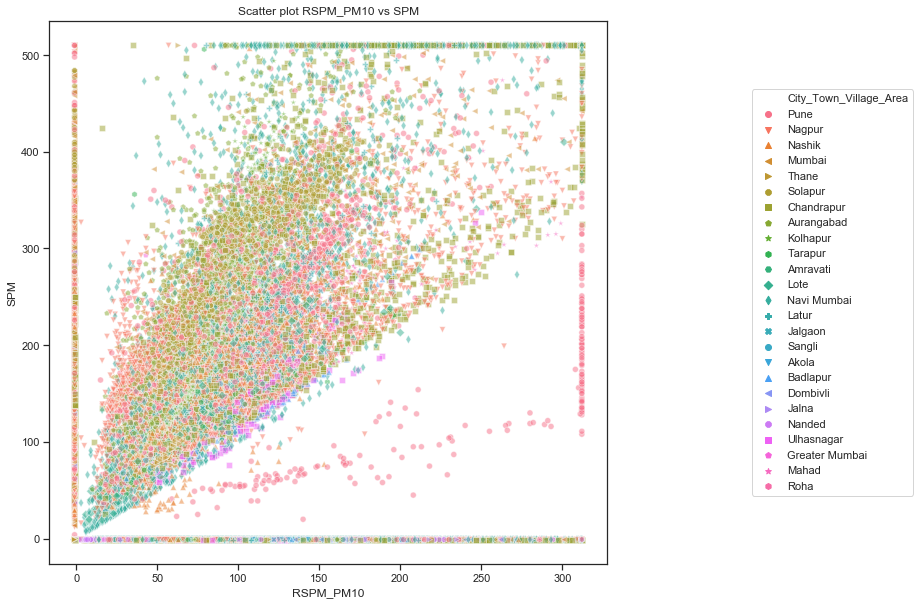

In [63]:
plt.figure(figsize=(10,10))
sns.set(style="ticks", color_codes=True)
#markers=[str(x) for i in range (1,26)]
markers=['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X','o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h']
g = sns.scatterplot(x='RSPM_PM10', y='SPM',  hue='City_Town_Village_Area',data=Base_Poll, alpha=0.5,style='City_Town_Village_Area',markers=markers)
#sns.set_context(1.3)
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.title('Scatter plot RSPM_PM10 vs SPM')
plt.xlabel('RSPM_PM10')
plt.ylabel('SPM')
plt.show()

In [64]:
### let's take median values monthly pollutant levels values for Type_of_Location level

In [65]:
Base_Poll_BKP=Base_Poll[:]

In [66]:
Base_Poll_BKP.head()

,ID,State,City_Town_Village_Area,Type_of_Location,SO2,NO2,RSPM_PM10,SPM,Sampling_Date_processed,month_number,year_number
0,1,Maharashtra,Pune,Residential,1.8,28.9,-1.0,271.0,1988-01-01,1,1988
1,2,Maharashtra,Nagpur,Residential,4.0,11.0,-1.0,120.0,2003-01-01,1,2003
2,3,Maharashtra,Nagpur,Residential,6.0,9.0,-1.0,69.0,2003-01-01,1,2003
3,4,Maharashtra,Nashik,Residential,31.0,26.0,38.0,86.0,2004-01-01,1,2004
4,5,Maharashtra,Pune,Residential,30.0,80.0,312.0,202.0,2004-01-01,1,2004


In [67]:
Base_Poll.loc[np.isnan(Base_Poll.SO2),['SO2']]=-1
Base_Poll.loc[np.isnan(Base_Poll.NO2),['NO2']]=-1
Base_Poll.loc[np.isnan(Base_Poll.RSPM_PM10),['RSPM_PM10']]=-1
Base_Poll.loc[np.isnan(Base_Poll.SPM),['SPM']]=-1


In [68]:
Base_Poll.loc[Base_Poll.SO2==-1,['SO2']]=None
Base_Poll.loc[Base_Poll.NO2==-1,['NO2']]=None
Base_Poll.loc[Base_Poll.RSPM_PM10==-1,['RSPM_PM10']]=None
Base_Poll.loc[Base_Poll.SPM==-1,['SPM']]=None

In [69]:
Grp_Base_Poll_NAN=Base_Poll.groupby(['City_Town_Village_Area', 'Type_of_Location','month_number','year_number'])['SO2','NO2','RSPM_PM10','SPM'].quantile(.5)

In [70]:
Grp_Base_Poll_NAN.shape

(5715, 4)

In [71]:
Grp_Base_Poll_NAN.head()

0.5                                                                SO2   NO2  \
City_Town_Village_Area Type_of_Location month_number year_number               
Akola                  Industrial       1            2011         11.0  12.0   
                                                     2012          9.5  11.0   
                                                     2013         10.0  11.5   
                                                     2015          7.0   9.0   
                                        2            2011          9.0  11.0   

0.5                                                               RSPM_PM10  \
City_Town_Village_Area Type_of_Location month_number year_number              
Akola                  Industrial       1            2011             149.0   
                                                     2012             137.0   
                                                     2013             155.0   
                                                     2015             127.0   
                                        2            2011             143.0   

0.5                                                               SPM  
City_Town_Village_Area Type_of_Location month_number year_number       
Akola                  Industrial       1            2011         NaN  
                                                     2012         NaN  
                                                     2013         NaN  
                                                     2015         NaN  
                                        2            2011         NaN

In [72]:
def nanper(x):
    return np.nanpercentile(x,50)
Grp_Base_Poll=Base_Poll.groupby(['City_Town_Village_Area', 'Type_of_Location','month_number','year_number']).agg(nanper)

In [210]:
def nanper(x):
    return np.nanpercentile(x,90)
Grp_Base_Poll_90=Base_Poll.groupby(['City_Town_Village_Area', 'Type_of_Location','month_number','year_number']).agg(nanper)

In [211]:
def nanper(x):
    return np.nanpercentile(x,10)
Grp_Base_Poll_10=Base_Poll.groupby(['City_Town_Village_Area', 'Type_of_Location','month_number','year_number']).agg(nanper)

In [213]:
Grp_Base_Poll_10.reset_index(inplace=True)
Grp_Base_Poll_90.reset_index(inplace=True)

In [223]:
print(Grp_Base_Poll_10.head)

<bound method NDFrame.head of      City_Town_Village_Area Type_of_Location  month_number  year_number   NO2  \
0                     Akola       Industrial             1         2011  10.4   
1                     Akola       Industrial             1         2012  10.0   
2                     Akola       Industrial             1         2013   8.9   
3                     Akola       Industrial             1         2015   8.8   
4                     Akola       Industrial             2         2011  10.2   
5                     Akola       Industrial             2         2012  10.7   
6                     Akola       Industrial             2         2013  10.4   
7                     Akola       Industrial             2         2015   9.0   
8                     Akola       Industrial             3         2011  10.0   
9                     Akola       Industrial             3         2012  12.6   
10                    Akola       Industrial             3         2015   9.0  

In [221]:
Grp_Base_Poll_10=Grp_Base_Poll_10[['City_Town_Village_Area', 'Type_of_Location', 'month_number',
       'year_number', 'NO2', 'RSPM_PM10', 'SO2', 'SPM']]
Grp_Base_Poll_90=Grp_Base_Poll_90[['City_Town_Village_Area', 'Type_of_Location', 'month_number',
       'year_number', 'NO2', 'RSPM_PM10', 'SO2', 'SPM']]

In [225]:
Grp_Base_Poll_10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5715 entries, 0 to 5714
Data columns (total 8 columns):
City_Town_Village_Area    5715 non-null object
Type_of_Location          5715 non-null object
month_number              5715 non-null int64
year_number               5715 non-null int64
NO2                       5677 non-null float64
RSPM_PM10                 3977 non-null float64
SO2                       5677 non-null float64
SPM                       2990 non-null float64
dtypes: float64(4), int64(2), object(2)
memory usage: 357.3+ KB


In [226]:
Grp_Base_Poll_10.to_csv(path_or_buf ='D:\personal\MS\EDA\Grp_Base_Poll_10.csv')
Grp_Base_Poll_90.to_csv(path_or_buf ='D:\personal\MS\EDA\Grp_Base_Poll_90.csv')

In [73]:
Grp_Base_Poll.head()

ID  \
City_Town_Village_Area Type_of_Location month_number year_number            
Akola                  Industrial       1            2011         15206.0   
                                                     2012         25807.0   
                                                     2013         29688.5   
                                                     2015         26976.0   
                                        2            2011         14464.0   

                                                                   NO2  \
City_Town_Village_Area Type_of_Location month_number year_number         
Akola                  Industrial       1            2011         12.0   
                                                     2012         11.0   
                                                     2013         11.5   
                                                     2015          9.0   
                                        2            2011         11.0   

                                                                  RSPM_PM10  \
City_Town_Village_Area Type_of_Location month_number year_number              
Akola                  Industrial       1            2011             149.0   
                                                     2012             137.0   
                                                     2013             155.0   
                                                     2015             127.0   
                                        2            2011             143.0   

                                                                   SO2  SPM  
City_Town_Village_Area Type_of_Location month_number year_number             
Akola                  Industrial       1            2011         11.0  NaN  
                                                     2012          9.5  NaN  
                                                     2013         10.0  NaN  
                                                     2015          7.0  NaN  
                                        2            2011          9.0  NaN

In [74]:
print(np.isnan(Grp_Base_Poll_NAN.SPM).sum())
print(np.isnan(Grp_Base_Poll.SPM).sum())


2725
2725


In [75]:
print(np.isnan(Grp_Base_Poll).sum())

ID              0
NO2            38
RSPM_PM10    1738
SO2            38
SPM          2725
dtype: int64


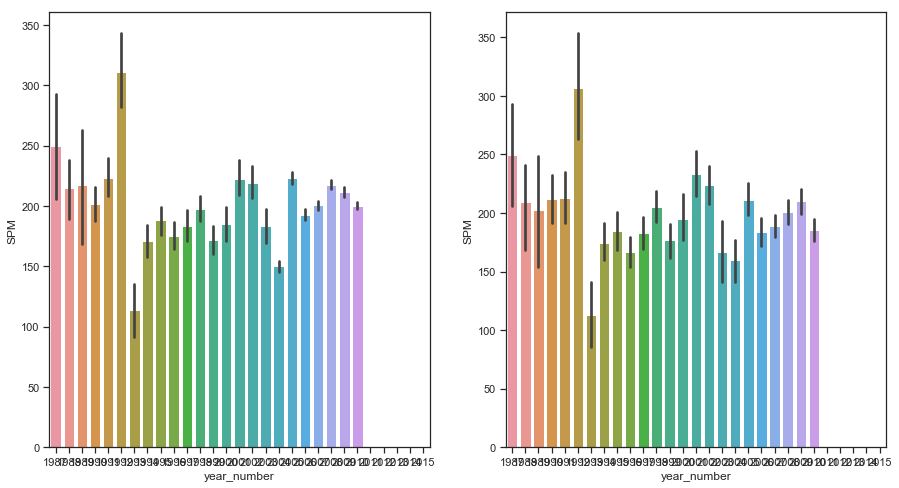

In [76]:
plt.figure(figsize = (15,8))
plt.subplot(1,2,1)
sns.barplot(x="year_number", y="SPM", data=Base_Poll)
plt.subplot(1,2,2)
Grp_Base_Poll.reset_index(inplace=True)
sns.barplot(x="year_number", y="SPM", data=Grp_Base_Poll)



In [77]:
Grp_Base_Poll.head()

,City_Town_Village_Area,Type_of_Location,month_number,year_number,ID,NO2,RSPM_PM10,SO2,SPM
0,Akola,Industrial,1,2011,15206.0,12.0,149.0,11.0,NaN
1,Akola,Industrial,1,2012,25807.0,11.0,137.0,9.5,NaN
2,Akola,Industrial,1,2013,29688.5,11.5,155.0,10.0,NaN
3,Akola,Industrial,1,2015,26976.0,9.0,127.0,7.0,NaN
4,Akola,Industrial,2,2011,14464.0,11.0,143.0,9.0,NaN


In [78]:
Grp_Base_Poll.set_index(['City_Town_Village_Area', 'Type_of_Location','month_number','year_number'],inplace=True)

In [79]:
Grp_Base_Poll.head()

ID  \
City_Town_Village_Area Type_of_Location month_number year_number            
Akola                  Industrial       1            2011         15206.0   
                                                     2012         25807.0   
                                                     2013         29688.5   
                                                     2015         26976.0   
                                        2            2011         14464.0   

                                                                   NO2  \
City_Town_Village_Area Type_of_Location month_number year_number         
Akola                  Industrial       1            2011         12.0   
                                                     2012         11.0   
                                                     2013         11.5   
                                                     2015          9.0   
                                        2            2011         11.0   

                                                                  RSPM_PM10  \
City_Town_Village_Area Type_of_Location month_number year_number              
Akola                  Industrial       1            2011             149.0   
                                                     2012             137.0   
                                                     2013             155.0   
                                                     2015             127.0   
                                        2            2011             143.0   

                                                                   SO2  SPM  
City_Town_Village_Area Type_of_Location month_number year_number             
Akola                  Industrial       1            2011         11.0  NaN  
                                                     2012          9.5  NaN  
                                                     2013         10.0  NaN  
                                                     2015          7.0  NaN  
                                        2            2011          9.0  NaN

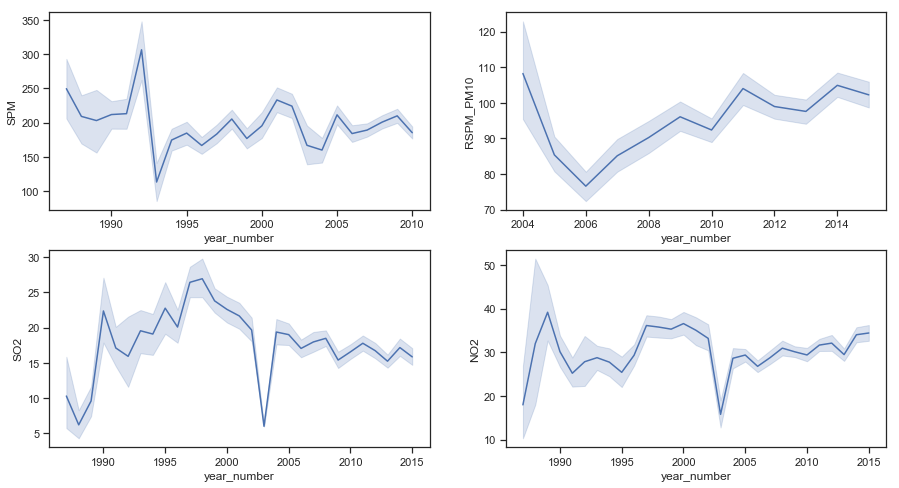

In [80]:
Grp_Base_Poll.reset_index(inplace=True)
plt.figure(figsize = (15,8))
plt.subplot(2,2,1)
sns.lineplot(x="year_number", y="SPM", data=Grp_Base_Poll)
plt.subplot(2,2,2)
sns.lineplot(x="year_number", y="RSPM_PM10", data=Grp_Base_Poll)
plt.subplot(2,2,3)
sns.lineplot(x="year_number", y="SO2", data=Grp_Base_Poll)
plt.subplot(2,2,4)
sns.lineplot(x="year_number", y="NO2", data=Grp_Base_Poll)


Grp_Base_Poll.set_index(['City_Town_Village_Area', 'Type_of_Location','month_number','year_number'],inplace=True)

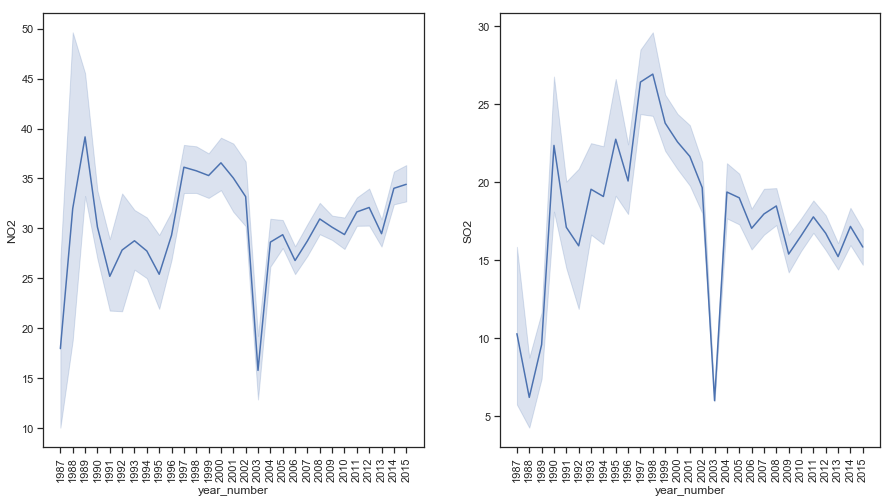

In [81]:
Grp_Base_Poll.reset_index(inplace=True)
plt.figure(figsize = (15,8))
plt.subplot(1,2,1)
plt.xticks(np.arange(min(Grp_Base_Poll.year_number), max(Grp_Base_Poll.year_number)+1, 1.0),rotation=90)
sns.lineplot(x="year_number", y="NO2", data=Grp_Base_Poll)
plt.subplot(1,2,2)
plt.xticks(np.arange(min(Grp_Base_Poll.year_number), max(Grp_Base_Poll.year_number)+1, 1.0),rotation=90)
sns.lineplot(x="year_number", y="SO2", data=Grp_Base_Poll)


Grp_Base_Poll.set_index(['City_Town_Village_Area', 'Type_of_Location','month_number','year_number'],inplace=True)


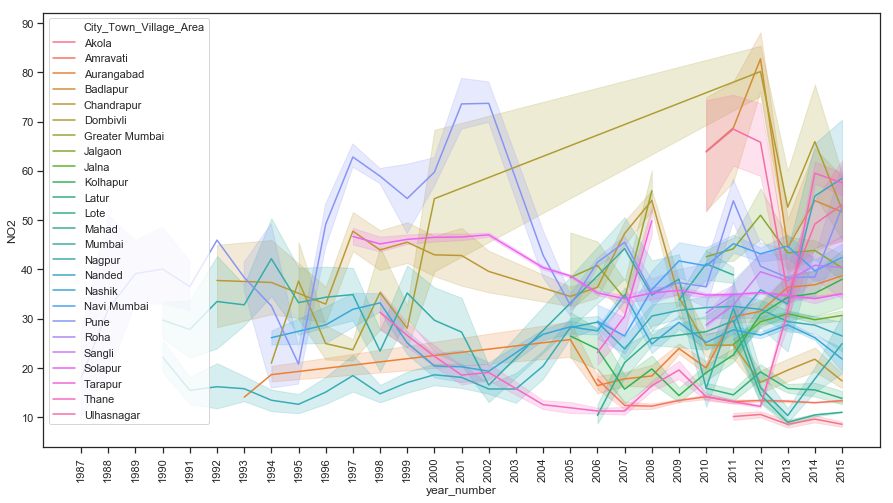

In [82]:
Grp_Base_Poll.reset_index(inplace=True)
plt.figure(figsize = (15,8))
plt.xticks(np.arange(min(Grp_Base_Poll.year_number), max(Grp_Base_Poll.year_number)+1, 1.0),rotation=90)
sns.lineplot(x="year_number", y="NO2",hue='City_Town_Village_Area', data=Grp_Base_Poll)
Grp_Base_Poll.set_index(['City_Town_Village_Area', 'Type_of_Location','month_number','year_number'],inplace=True)


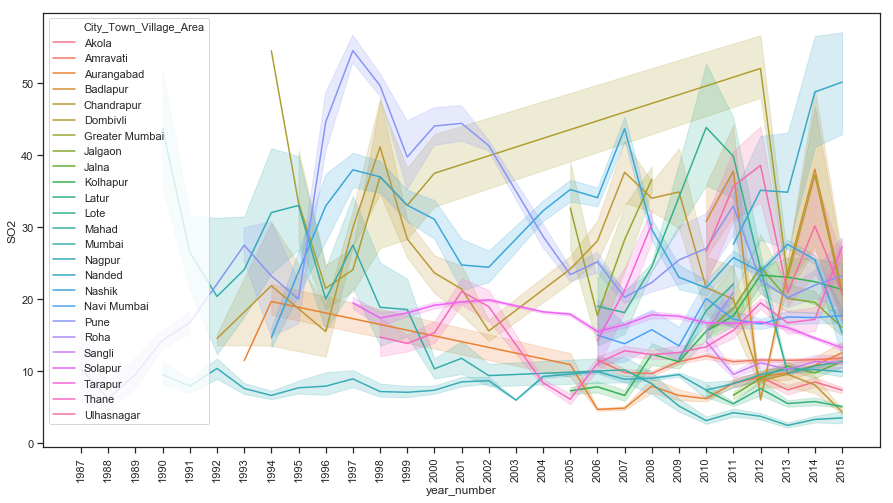

In [83]:
Grp_Base_Poll.reset_index(inplace=True)
plt.figure(figsize = (15,8))
plt.xticks(np.arange(min(Grp_Base_Poll.year_number), max(Grp_Base_Poll.year_number)+1, 1.0),rotation=90)
sns.lineplot(x="year_number", y="SO2",hue='City_Town_Village_Area',  data=Grp_Base_Poll)
Grp_Base_Poll.set_index(['City_Town_Village_Area', 'Type_of_Location','month_number','year_number'],inplace=True)


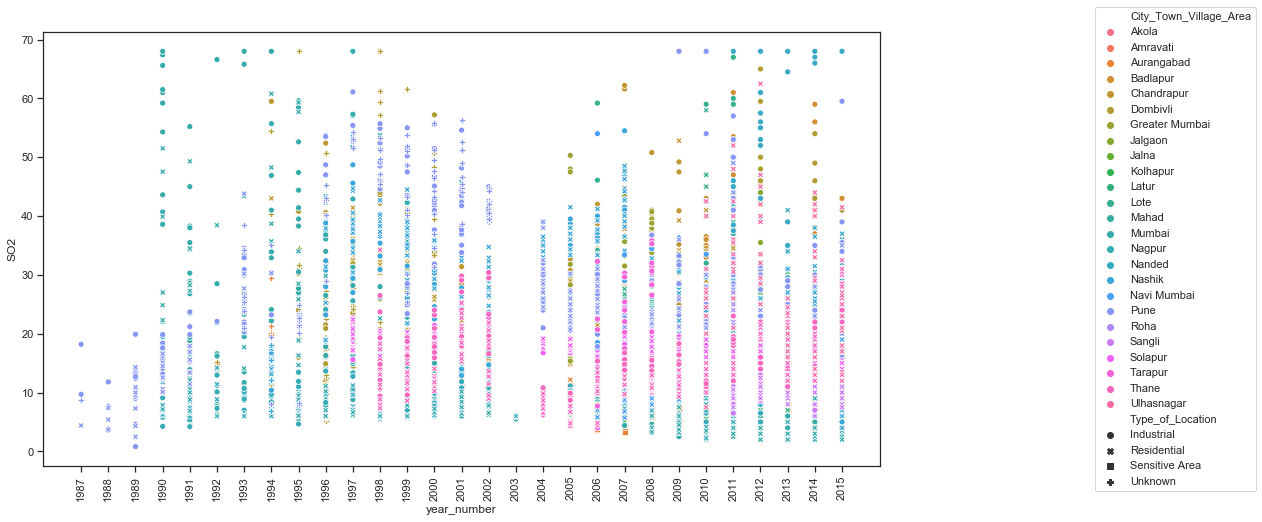

In [84]:
Grp_Base_Poll.reset_index(inplace=True)
plt.figure(figsize = (15,8))
plt.xticks(np.arange(min(Grp_Base_Poll.year_number), max(Grp_Base_Poll.year_number)+1, 1.0),rotation=90)
g =sns.scatterplot(x="year_number", y="SO2",hue='City_Town_Village_Area', style='Type_of_Location', data=Grp_Base_Poll)
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
Grp_Base_Poll.set_index(['City_Town_Village_Area', 'Type_of_Location','month_number','year_number'],inplace=True)

In [85]:
Grp_Base_Poll.set_index(['City_Town_Village_Area', 'Type_of_Location','month_number','year_number'],inplace=True)

KeyError: 'City_Town_Village_Area'

In [ ]:
Grp_Base_Poll.reset_index(inplace=True)
Grp_SO2_Base_Poll=Grp_Base_Poll.groupby(['City_Town_Village_Area', 'Type_of_Location'])['SO2'].var()
Grp_SO2_Base_Poll=pd.DataFrame(data=Grp_SO2_Base_Poll)
Grp_SO2_Base_Poll.reset_index(inplace=True)
Grp_SO2_Base_Poll.sort_values('SO2',inplace=True,ascending=False)
print(Grp_SO2_Base_Poll)
Grp_Base_Poll.set_index(['City_Town_Village_Area', 'Type_of_Location','month_number','year_number'],inplace=True)

In [ ]:
Grp_Base_Poll.set_index(['City_Town_Village_Area', 'Type_of_Location','month_number','year_number'],inplace=True)

In [ ]:
Grp_Base_Poll.head(20)

In [ ]:
Grp_Base_Poll.reset_index(inplace=True)
n=5
plot=Grp_SO2_Base_Poll[['City_Town_Village_Area','Type_of_Location']].head(n)
plot=pd.merge(Grp_Base_Poll,plot, on=['City_Town_Village_Area'])
plot
plt.figure(figsize = (20,10))
plt.xticks(np.arange(min(plot.year_number), max(plot.year_number)+1, 1.0),rotation=90)

g =sns.scatterplot(x="year_number", y="SO2",hue='City_Town_Village_Area', style='Type_of_Location_x', data=plot)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
Grp_Base_Poll.set_index(['City_Town_Village_Area', 'Type_of_Location','month_number','year_number'],inplace=True)

In [ ]:
Grp_Base_Poll.reset_index(inplace=True)
plt.figure(figsize = (15,8))
plt.xticks(np.arange(min(plot.year_number), max(plot.year_number)+1, 1.0),rotation=90)
sns.lineplot(x="year_number", y="SO2",hue='City_Town_Village_Area',  data=plot)
Grp_Base_Poll.set_index(['City_Town_Village_Area', 'Type_of_Location','month_number','year_number'],inplace=True)


In [101]:
Grp_Base_Poll.reset_index(inplace=True)
Grp_Base_Poll.set_index(['City_Town_Village_Area', 'Type_of_Location','year_number','month_number'],inplace=True)

In [163]:
Grp_Base_Poll['TS']=Grp_Base_Poll.year_number*10000+Grp_Base_Poll.month_number*10
Grp_Base_Poll.head()

,City_Town_Village_Area,Type_of_Location,TS,year_number,month_number,level_0,index,ID,NO2,RSPM_PM10,SO2,SPM,SO2_MOM,SO2_MOM_diff,month_number_diff
0,Akola,Industrial,20110010,2011,1,0,0,15206.0,12.0,149.0,11.0,NaN,NaN,NaN,NaN
1,Akola,Industrial,20110020,2011,2,4,4,14464.0,11.0,143.0,9.0,NaN,11.0,-2.0,1.0
2,Akola,Industrial,20110030,2011,3,8,8,19350.0,10.0,139.0,9.0,NaN,9.0,0.0,1.0
3,Akola,Industrial,20110040,2011,4,11,11,36924.0,14.0,165.0,12.0,NaN,9.0,3.0,1.0
4,Akola,Industrial,20110050,2011,5,14,14,33194.0,14.0,148.0,12.0,NaN,12.0,0.0,1.0


In [162]:
#Grp_Base_Poll.drop(columns='TS',inplace=True)
#Grp_Base_Poll.reset_index(inplace=True)

In [164]:
Grp_Base_Poll.sort_values(by=['City_Town_Village_Area', 'Type_of_Location','TS'],inplace=True)

In [165]:
Grp_Base_Poll.set_index(['City_Town_Village_Area', 'Type_of_Location','TS',],inplace=True)



In [166]:
Grp_Base_Poll.head(n=20)

year_number  month_number  \
City_Town_Village_Area Type_of_Location TS                                    
Akola                  Industrial       20110010         2011             1   
                                        20110020         2011             2   
                                        20110030         2011             3   
                                        20110040         2011             4   
                                        20110050         2011             5   
                                        20110060         2011             6   
                                        20110070         2011             7   
                                        20110080         2011             8   
                                        20110090         2011             9   
                                        20110100         2011            10   
                                        20110110         2011            11   
                                        20110120         2011            12   
                                        20120010         2012             1   
                                        20120020         2012             2   
                                        20120030         2012             3   
                                        20120040         2012             4   
                                        20120050         2012             5   
                                        20120060         2012             6   
                                        20120070         2012             7   
                                        20120080         2012             8   

                                                  level_0  index       ID  \
City_Town_Village_Area Type_of_Location TS                                  
Akola                  Industrial       20110010        0      0  15206.0   
                                        20110020        4      4  14464.0   
                                        20110030        8      8  19350.0   
                                        20110040       11     11  36924.0   
                                        20110050       14     14  33194.0   
                                        20110060       17     17  41077.0   
                                        20110070       20     20  31666.5   
                                        20110080       23     23  33707.0   
                                        20110090       26     26  33846.5   
                                        20110100       30     30  25415.0   
                                        20110110       34     34  32215.0   
                                        20110120       38     38  34337.0   
                                        20120010        1      1  25807.0   
                                        20120020        5      5  27970.0   
                                        20120030        9      9  38704.0   
                                        20120040       12     12  25320.5   
                                        20120050       15     15  30317.5   
                                        20120060       18     18  25782.0   
                                        20120070       21     21  33547.0   
                                        20120080       24     24  28870.5   

                                                   NO2  RSPM_PM10   SO2  SPM  \
City_Town_Village_Area Type_of_Location TS                                     
Akola                  Industrial       20110010  12.0    149.000  11.0  NaN   
                                        20110020  11.0    143.000   9.0  NaN   
                                        20110030  10.0    139.000   9.0  NaN   
                                        20110040  14.0    165.000  12.0  NaN   
                                        20110050  14.0    148.000  12.0  NaN   
                                        20110060  11.0  

In [167]:
Grp_Base_Poll['SO2_MOM']=Grp_Base_Poll.groupby(level=['City_Town_Village_Area', 'Type_of_Location'])['SO2'].shift(1)
Grp_Base_Poll['SO2_MOM_diff']=Grp_Base_Poll['SO2']-Grp_Base_Poll['SO2_MOM']

In [168]:
Grp_Base_Poll['month_number_diff']=Grp_Base_Poll.month_number-Grp_Base_Poll.groupby(level=['City_Town_Village_Area', 'Type_of_Location'])['month_number'].shift(1)

In [184]:
Grp_Base_Poll.loc[~((Grp_Base_Poll.month_number_diff==1) | (Grp_Base_Poll.month_number_diff==-11)),'SO2_MOM_diff']=None

In [186]:
Grp_Base_Poll['NO2_MOM_diff']=Grp_Base_Poll['NO2']-Grp_Base_Poll.groupby(level=['City_Town_Village_Area', 'Type_of_Location'])['NO2'].shift(1)

In [187]:
Grp_Base_Poll.loc[~((Grp_Base_Poll.month_number_diff==1) | (Grp_Base_Poll.month_number_diff==-11)),'NO2_MOM_diff']=None

In [188]:
Grp_Base_Poll['RSPM_PM10_MOM_diff']=Grp_Base_Poll['RSPM_PM10']-Grp_Base_Poll.groupby(level=['City_Town_Village_Area', 'Type_of_Location'])['RSPM_PM10'].shift(1)

In [189]:
Grp_Base_Poll.loc[~((Grp_Base_Poll.month_number_diff==1) | (Grp_Base_Poll.month_number_diff==-11)),'RSPM_PM10_MOM_diff']=None

In [190]:
Grp_Base_Poll['SPM_MOM_diff']=Grp_Base_Poll['SPM']-Grp_Base_Poll.groupby(level=['City_Town_Village_Area', 'Type_of_Location'])['SPM'].shift(1)

In [191]:
Grp_Base_Poll.loc[~((Grp_Base_Poll.month_number_diff==1) | (Grp_Base_Poll.month_number_diff==-11)),'SPM_MOM_diff']=None

In [200]:
import numpy
Grp_Base_Poll.loc[~(numpy.isnan(Grp_Base_Poll.SPM))].head()

year_number  month_number  \
City_Town_Village_Area Type_of_Location TS                                    
Aurangabad             Residential      20060010         2006             1   
                                        20060020         2006             2   
                                        20060030         2006             3   
                                        20060040         2006             4   
                                        20060050         2006             5   

                                                  level_0  index       ID  \
City_Town_Village_Area Type_of_Location TS                                  
Aurangabad             Residential      20060010      309    309  24883.0   
                                        20060020      320    320  26986.0   
                                        20060030      331    331  32829.0   
                                        20060040      341    341  25387.0   
                                        20060050      351    351  32173.0   

                                                   NO2  RSPM_PM10  SO2    SPM  \
City_Town_Village_Area Type_of_Location TS                                      
Aurangabad             Residential      20060010  29.5       84.0  5.0  203.0   
                                        20060020  26.3       35.5  5.0   83.5   
                                        20060030  20.2       50.0  4.5  113.0   
                                        20060040  18.8      100.5  5.0  246.5   
                                        20060050  18.0       72.0  5.5  203.0   

                                                  SO2_MOM  SO2_MOM_diff  \
City_Town_Village_Area Type_of_Location TS                                
Aurangabad             Residential      20060010     7.35         -2.35   
                                        20060020     5.00          0.00   
                                        20060030     5.00         -0.50   
                                        20060040     4.50          0.50   
                                        20060050     5.00          0.50   

                                                  month_number_diff  \
City_Town_Village_Area Type_of_Location TS                            
Aurangabad             Residential      20060010              -11.0   
                                        20060020                1.0   
                                        20060030                1.0   
                                        20060040                1.0   
                                        20060050                1.0   

                                                  NO2_MOM_diff  \
City_Town_Village_Area Type_of_Location TS                       
Aurangabad             Residential      20060010           1.0   
                                        20060020          -3.2   
                                        20060030          -6.1   
                                        20060040          -1.4   
                                        20060050          -0.8   

                                                  RSPM_PM10_MOM_diff  \
City_Town_Village_Area Type_of_Location TS                             
Aurangabad             Residential      20060010                 NaN   
                                        20060020               -48.5   
                                        20060030                14.5   
                                        20060040                50.5   
                                        20060050               -28.5   

                                                  SPM_MOM_diff  
City_Town_Village_Area Type_of_Location TS                      
Aurangabad             Residential      20060010           NaN  
                                        20060020        -119.5  
                                        20060030          29.5  
                                        20060040         133.5  
      

In [202]:
Grp_Base_Poll.head(n=10)

,City_Town_Village_Area,Type_of_Location,TS,year_number,month_number,level_0,index,ID,NO2,RSPM_PM10,SO2,SPM,SO2_MOM,SO2_MOM_diff,month_number_diff,NO2_MOM_diff,RSPM_PM10_MOM_diff,SPM_MOM_diff
0,Akola,Industrial,20110010,2011,1,0,0,15206.0,12.0,149.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Akola,Industrial,20110020,2011,2,4,4,14464.0,11.0,143.0,9.0,NaN,11.0,-2.0,1.0,-1.0,-6.0,NaN
2,Akola,Industrial,20110030,2011,3,8,8,19350.0,10.0,139.0,9.0,NaN,9.0,0.0,1.0,-1.0,-4.0,NaN
3,Akola,Industrial,20110040,2011,4,11,11,36924.0,14.0,165.0,12.0,NaN,9.0,3.0,1.0,4.0,26.0,NaN
4,Akola,Industrial,20110050,2011,5,14,14,33194.0,14.0,148.0,12.0,NaN,12.0,0.0,1.0,0.0,-17.0,NaN
5,Akola,Industrial,20110060,2011,6,17,17,41077.0,11.0,126.0,9.0,NaN,12.0,-3.0,1.0,-3.0,-22.0,NaN
6,Akola,Industrial,20110070,2011,7,20,20,31666.5,10.0,113.0,7.0,NaN,9.0,-2.0,1.0,-1.0,-13.0,NaN
7,Akola,Industrial,20110080,2011,8,23,23,33707.0,9.0,131.0,8.0,NaN,7.0,1.0,1.0,-1.0,18.0,NaN
8,Akola,Industrial,20110090,2011,9,26,26,33846.5,10.0,136.0,8.0,NaN,8.0,0.0,1.0,1.0,5.0,NaN
9,Akola,Industrial,20110100,2011,10,30,30,25415.0,10.5,141.0,9.0,NaN,8.0,1.0,1.0,0.5,5.0,NaN


In [209]:
MOM_Diff=Grp_Base_Poll[['City_Town_Village_Area', 'Type_of_Location', 'TS', 'year_number',
       'month_number', 'NO2', 'RSPM_PM10', 'SO2',
       'SPM', 'SO2_MOM_diff', 'month_number_diff', 'NO2_MOM_diff',
       'RSPM_PM10_MOM_diff', 'SPM_MOM_diff']]
MOM_Diff.to_csv(path_or_buf ='D:\personal\MS\EDA\MOM_Diff.csv')

In [201]:
Grp_Base_Poll.reset_index(inplace=True)

In [203]:
Grp_Base_Poll.columns

Index(['City_Town_Village_Area', 'Type_of_Location', 'TS', 'year_number',
       'month_number', 'level_0', 'index', 'ID', 'NO2', 'RSPM_PM10', 'SO2',
       'SPM', 'SO2_MOM', 'SO2_MOM_diff', 'month_number_diff', 'NO2_MOM_diff',
       'RSPM_PM10_MOM_diff', 'SPM_MOM_diff'],
      dtype='object')

In [112]:

Grp_Base_Poll.set_index(['City_Town_Village_Area', 'Type_of_Location','year_number','month_number'],inplace=True)
Grp_Base_Poll.reset_index(inplace=True)
Grp_Base_Poll.head(n=20)

,City_Town_Village_Area,Type_of_Location,year_number,month_number,level_0,index,ID,NO2,RSPM_PM10,SO2,SPM,SO2_MOM
0,Akola,Industrial,2011,1,0,0,15206.0,12.0,149.000,11.0,NaN,NaN
1,Akola,Industrial,2012,1,1,1,25807.0,11.0,137.000,9.5,NaN,NaN
2,Akola,Industrial,2013,1,2,2,29688.5,11.5,155.000,10.0,NaN,NaN
3,Akola,Industrial,2015,1,3,3,26976.0,9.0,127.000,7.0,NaN,NaN
4,Akola,Industrial,2011,2,4,4,14464.0,11.0,143.000,9.0,NaN,NaN
5,Akola,Industrial,2012,2,5,5,27970.0,13.0,150.335,11.0,NaN,NaN
6,Akola,Industrial,2013,2,6,6,30883.0,12.0,146.500,10.0,NaN,NaN
7,Akola,Industrial,2015,2,7,7,27040.0,9.5,129.000,8.0,NaN,NaN
8,Akola,Industrial,2011,3,8,8,19350.0,10.0,139.000,9.0,NaN,NaN
9,Akola,Industrial,2012,3,9,9,38704.0,13.0,161.670,12.0,NaN,NaN


In [ ]:
print(Base_Poll.columns)
print(Grp_Base_Poll.columns)

In [ ]:
len(('Motivation:Indian Government has recently released few disturbing facts about how the increase in air Pollution had a degrading impact on Indian Living conditions.1.	Air pollution can be attributed to of 12.5% of deaths in India. [1]2.	12.4 lakh deaths in India attributed to air pollution in 2017, of which 50+% were in individuals younger than 70 years.[1]3.	Life expectancy in India has gone down by 1.7 years due to health loss caused by higher (than accepted) air pollution level. [1]We will attempt to analyse localize impact on region of Maharashtra in detail. Summary:	Analyse & Categorize the rate at which air pollution is increasing in Various cities & Towns of Maharashtra using clustering techniques like hierarchical clustering and K-mean.o	Validate how city progression maps to its Air pollution levels?	Understand how various pollutants and other features co-relates to each other using PCA	Is their time based (seasonal & otherwise) variation in the spread of various pollutant, via EDA.	Use timeseries analysis to project the pollution growth pattern in the coming year and predict when the air pollutant level goes beyond breathable standards.').split(' '))

In [ ]:
len(('1.	Categorize various regions within Maharashtra, India based on Air pollution trend.a.	Separating out Healthy, unhealthy and risky cities into categories, might enable  us to put similar preventive measure. 2.	Analyse the difference between these categories of regions w.r.tI.	Concentration TypeII.	Rate of Change (Yearly, Quarterly etc)III.	PopulationIV.	Elevation from Sea levelV.	Seasonal Time of YearVI.	Buying trends of automobiles/Impact of Additional VehiclesVII.	Rainfall levelsVIII.	LongitudeIX.	LatitudeX.	Othersa.	Understanding if any one particular variable has a major say in the pollution trends.3.	How does cities like Pune (An IT Hub in India) & Mumbai (An Overall commercial Hub) fair against Neighbouring upcoming Towns (Nasik, Nagpur) versus the less progressive one like Ahmednagar, Solapur over the last couple of decades?a.	Understanding the extent of impact of a city progression, might help us plan out city development (may be put better restrains) better.4.	Understating if One pollutant impacts the presence of another.a.	Understanding pollutants correlation and impact of other variables may help us modulate them better? 5.	Predicting by when the Air pollution levels will go beyond acceptable?a.	Gives us a time frame to put-up a plan & to act on it before thing become irreversible.6.	Understanding the seasonal behaviour of the pollutants?a.	Different seasons might call of different actions, only when we know how they differ can we effectively counter them.').split(' '))